# Набор генерируемых данных

В рамках настоящего задания продолжим тематику нашего сквозного проекта с использованием данных по стоимости и длительности перевозок грузов из одной точки (Гуанджоу, Китай) в другую (Москва, Россия).

# 1. Импорт необходимых библиотек

In [148]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. Создание датасетов и визуализация

In [156]:
# установим конкретное начальное число для воспроизводимости датасетов
rng = np.random.default_rng(seed=1)

In [157]:
# определим функцию для генарации датасетов
def generate_data(num_samples):
    price = np.abs(np.linspace(500000, 800000, num_samples)+100000)
    noise = np.abs(np.random.normal(0, 50000, num_samples))
    delivery_time = (np.abs(np.linspace(25, 10, num_samples)) + np.random.rand(num_samples))

    data = pd.DataFrame({
        'price': price,
        'delivery_time': delivery_time,
    })

    return data

In [158]:
# создадим три набора данных с качественными данными
dataset1 = generate_data(100)
dataset2 = generate_data(100)
dataset3 = generate_data(100)

In [159]:
# создадим набор данных с шумом
noisy_dataset = generate_data(100)
noisy_dataset['delivery_time'] += rng.normal(0, 10, 100)

In [160]:
# построеним графики рассеяния для каждого набора данных
def plot_scatter(dataset, title):
    xs = dataset['price']
    ys = dataset['delivery_time']
    plt.scatter(xs, ys)
    plt.title(title)
    plt.xlabel('Price')
    plt.ylabel('Delivery Time')
    plt.show()

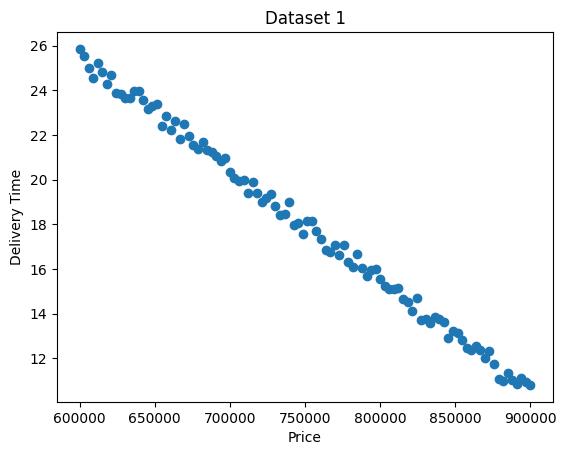

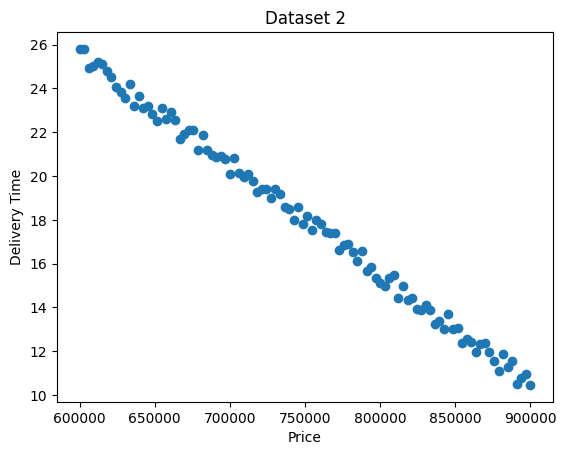

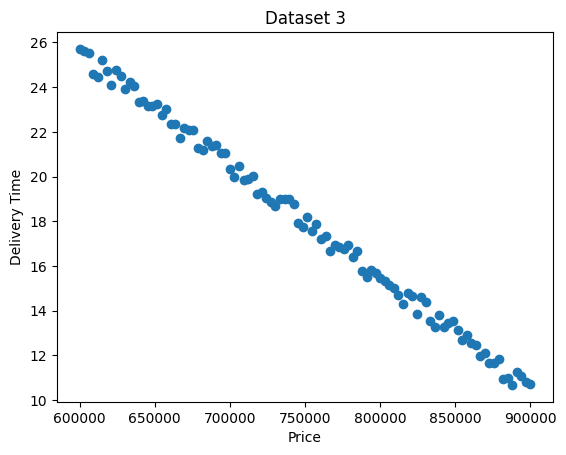

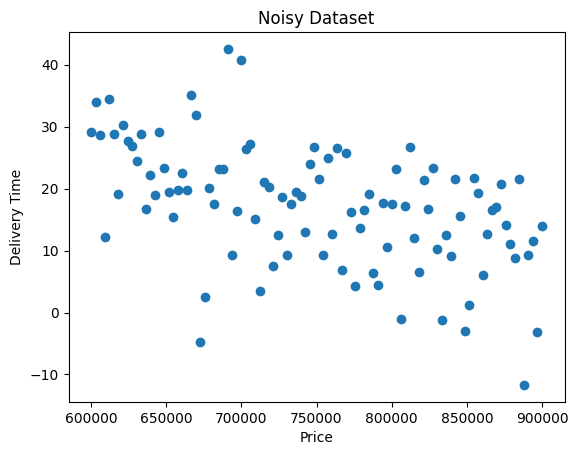

In [161]:
# выведем диаграммы рассеяния для четырех наборов данных
plot_scatter(dataset1, "Dataset 1")
plot_scatter(dataset2, "Dataset 2")
plot_scatter(dataset3, "Dataset 3")
plot_scatter(noisy_dataset, "Noisy Dataset")

# 3. Обучение модели линейной регрессии на одном из датасетов

In [163]:
# обучим модель линейной регрессии на одном из наборов данных
X_train, X_test, y_train, y_test = train_test_split(
    dataset1[['price']], dataset1['delivery_time'], test_size=0.2, random_state=42
)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

# 4. Анализ качества предсказания

In [164]:
def analyze_predictions(xs, ys, dataset_name, idx):
    X_test = xs['price'].values.reshape(-1, 1)
    y_test = ys.values
    predictions = regression_model.predict(X_test)

    np.savetxt(f"ys_{idx}.csv", y_test, delimiter=",")
    np.savetxt(f"y_pred_{idx}.csv", predictions, delimiter=",")

    plt.scatter(X_test, y_test)
    plt.plot(X_test, predictions, color="red")
    plt.title(f"{dataset_name} Prediction")
    plt.show()

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    coef = regression_model.coef_

    print(f"MSE for {dataset_name}: {mse:.2f}")
    print(f"R2 for {dataset_name}: {r2:.2f}")
    print(f"Coefficients for {dataset_name}: {coef[0]:.2f}")
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


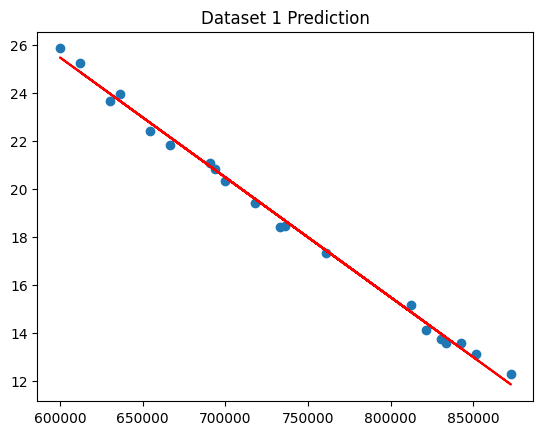

MSE for Dataset 1: 0.08
R2 for Dataset 1: 1.00
Coefficients for Dataset 1: -0.00



In [165]:
analyze_predictions(X_test, y_test, "Dataset 1", 1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


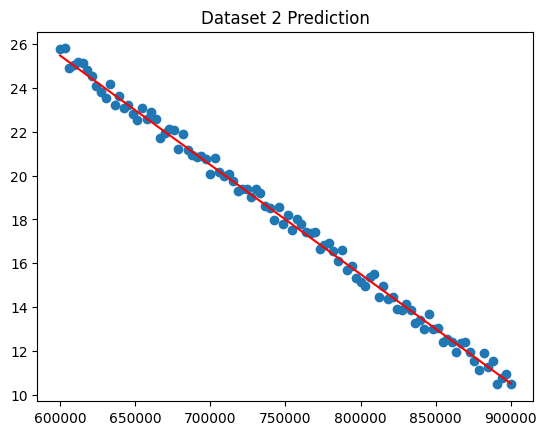

MSE for Dataset 2: 0.08
R2 for Dataset 2: 1.00
Coefficients for Dataset 2: -0.00



In [166]:
analyze_predictions(dataset2, dataset2['delivery_time'], "Dataset 2", 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


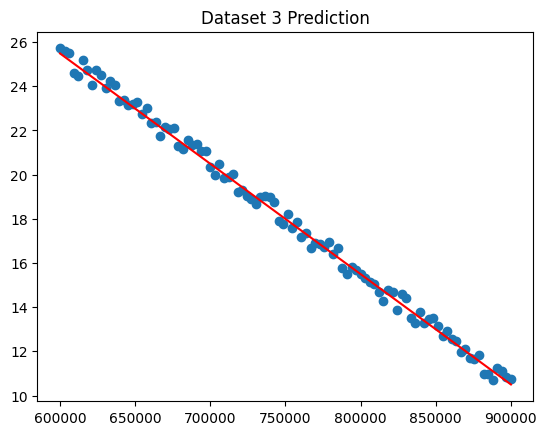

MSE for Dataset 3: 0.08
R2 for Dataset 3: 1.00
Coefficients for Dataset 3: -0.00



In [167]:
analyze_predictions(dataset3, dataset3['delivery_time'], "Dataset 3", 3)

Таким образом, метрики для Dataset 1, Dataset 2 и Dataset 3 имеют следующие значения:

Среднеквадратичная ошибка (MSE) для Dataset 1: 0.08
Коэффициент детерминации (R2) для Dataset 1: 1.00
Коэффициенты для Dataset 1: -0.00

Для Dataset 1, среднеквадратичная ошибка (MSE) составляет 0.08. MSE представляет собой меру разброса между фактическими значениями и прогнозируемыми значениями. В данном случае, MSE равное 0.08 говорит о том, что модель достаточно точно предсказывает значения доставки.

Коэффициент детерминации (R2) для Dataset 1 равен 1.00. R2 представляет собой меру, насколько хорошо модель соответствует данным. Значение 1.00 означает, что модель объясняет всю изменчивость зависимой переменной (время доставки) с помощью независимой переменной (цена). Это говорит о том, что модель очень хорошо соответствует данным и может точно предсказывать время доставки на основе цены.

Коэффициенты для Dataset 1 равны -0.00. Это означает, что в данном случае цена не оказывает статистически значимого влияния на время доставки.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


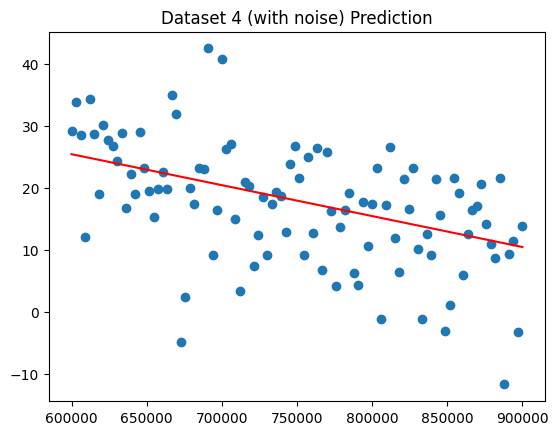

MSE for Dataset 4 (with noise): 72.86
R2 for Dataset 4 (with noise): 0.24
Coefficients for Dataset 4 (with noise): -0.00



In [168]:
analyze_predictions(noisy_dataset, noisy_dataset['delivery_time'], "Dataset 4 (with noise)", 4)

MSE для Dataset 4 (с шумом) составляет 72.86. MSE представляет собой меру разброса между фактическими значениями и прогнозируемыми значениями. В данном случае, MSE равное 72.86 указывает на более высокий уровень ошибки в предсказаниях модели, по сравнению с предыдущими наборами данных.

Коэффициент детерминации (R2) для Dataset 4 (с шумом) равен 0.24. R2 представляет собой меру, насколько хорошо модель соответствует данным. Значение 0.24 означает, что модель объясняет около 24% изменчивости зависимой переменной (время доставки) с помощью независимой переменной (цена). Это говорит о том, что модель не очень хорошо соответствует данным и есть значительная необъясненная изменчивость.

Коэффициенты для Dataset 4 (с шумом) равны -0.00. Это означает, что в данном случае цена также не оказывает статистически значимого влияния на время доставки, даже при наличии шума в данных.

# 5. Обнаружение проблемы на датасете с шумами

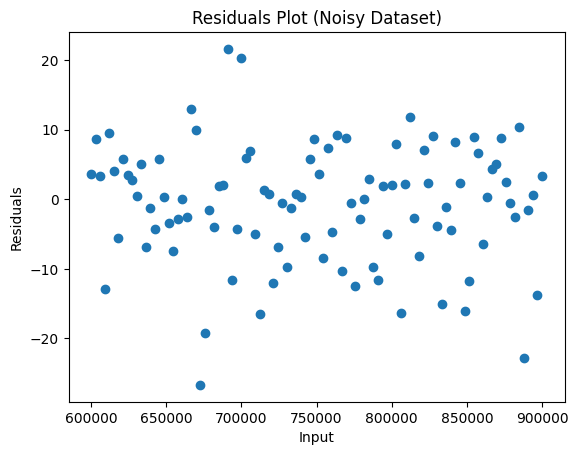

In [169]:
# Анализ остатков модели на датасете 4
y_pred4 = regression_model.predict(noisy_dataset[['price']])
residuals = noisy_dataset['delivery_time'] - y_pred4

plt.scatter(noisy_dataset['price'], residuals)
plt.xlabel("Input")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Noisy Dataset)")
plt.show()


Судя по анализу остатков модели, то есть разницы между фактическими значениями и предсказанными значениями, остатки показывают некоторую структуру или паттерн, что может указывать на проблему в модели или неучтённые факторы в данных. Проведём тестирование данных.

# 6. Тестирование работы модели на всех датасетах

In [170]:
# Тестирование модели на разных наборах данных
%%writefile test_score.py

import pytest
import pandas as pd
from sklearn.linear_model import LinearRegression

@pytest.fixture
def dataset():
    data = {'price': [500000, 503030, 506060, 509090, 512121],
            'delivery_time': [10, 20, 30, 40, 50]}
    return pd.DataFrame(data)

def test_model_score(dataset):
    X_train = dataset['price']
    y_train = dataset['delivery_time']
    regression_model = LinearRegression()
    regression_model.fit(X_train.values.reshape(-1, 1), y_train)
    score = regression_model.score(X_train.values.reshape(-1, 1), y_train)
    assert score == pytest.approx(0.0, abs=1e-2)


Overwriting test_score.py


In [171]:
!cat test_score.py


import pytest
import pandas as pd
from sklearn.linear_model import LinearRegression

@pytest.fixture
def dataset():
    data = {'price': [500000, 503030, 506060, 509090, 512121],
            'delivery_time': [10, 20, 30, 40, 50]}
    return pd.DataFrame(data)

def test_model_score(dataset):
    X_train = dataset['price']
    y_train = dataset['delivery_time']
    regression_model = LinearRegression()
    regression_model.fit(X_train.values.reshape(-1, 1), y_train)
    score = regression_model.score(X_train.values.reshape(-1, 1), y_train)
    assert score == pytest.approx(0.0, abs=1e-2)


In [172]:
!pytest -v test_score.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 1 item                                                               

test_score.py::test_model_score FAILED                                   [100%]

=================================== FAILURES ===================================
_______________________________ test_model_score _______________________________

dataset =     price  delivery_time
0  500000             10
1  503030             20
2  506060             30
3  509090             40
4  512121             50

    def test_model_score(dataset):
        X_train = dataset['price']
        y_train = dataset['delivery_time']
        regression_model = LinearRegression()
        regression_model.fit(X_train.values.reshape(-1, 1), y_train)
        score = regression_model.score(X_train.values.reshape

Тест завершился неудачно, поскольку оценка модели (R-квадрат), полученная из модели линейной регрессии, не равна 0,0 в пределах указанного допуска ± 0,01.

Оценка утверждения == pytest. приблизительно (0,0, abs = 1e-2) предполагает, что оценка модели будет очень близка к 0,0, но результирующая оценка составляет приблизительно 1,0.

Это говорит о том, что модель очень хорошо соответствует обучающим данным с высоким значением R-квадрата 0,9999999956437038, что указывает на сильную линейную связь между функциями и целевой переменной.

Чтобы решить эту проблему, мы можем обновить ожидаемую оценку в утверждении, чтобы она соответствовала фактической оценке, полученной из модели.

В качестве альтернативы изменим критерии тестирования чтобы проверить значение, большее или равное 0,9:

In [173]:
%%writefile test_score2.py

import pytest
import pandas as pd
from sklearn.linear_model import LinearRegression

@pytest.fixture
def dataset():
    data = {'price': [500000, 503030, 506060, 509090, 512121],
            'delivery_time': [10, 20, 30, 40, 50]}
    return pd.DataFrame(data)

def test_model_score(dataset):
    X_train = dataset['price']
    y_train = dataset['delivery_time']
    regression_model = LinearRegression()
    regression_model.fit(X_train.values.reshape(-1, 1), y_train)
    score = regression_model.score(X_train.values.reshape(-1, 1), y_train)
    assert score >= 0.9

Overwriting test_score2.py


In [174]:
!pytest -v test_score2.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 1 item                                                               

test_score2.py::test_model_score PASSED                                  [100%]

============================== 1 passed in 1.06s ===============================


Как видим, теперь тест пройден.

#### Юнит-тест

In [175]:
!mkdir test_module

mkdir: cannot create directory ‘test_module’: File exists


In [176]:
%%writefile test_module/test_unit.py
import numpy as np
import unittest
from sklearn.metrics import mean_squared_error, r2_score

class TestMethods(unittest.TestCase):
    def test_mse(self):
        load_ys = [np.loadtxt(f"ys_{idx}.csv", delimiter=",") for idx in range(1, 5)]
        load_y_pred = [np.loadtxt(f"y_pred_{idx}.csv", delimiter=",") for idx in range(1, 5)]

        for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
            self.assertLess(mean_squared_error(ys, y_pred), 1, f"Test failed for dataset {idx}")

    def test_r2(self):
        load_ys = [np.loadtxt(f"ys_{idx}.csv", delimiter=",") for idx in range(1, 5)]
        load_y_pred = [np.loadtxt(f"y_pred_{idx}.csv", delimiter=",") for idx in range(1, 5)]

        for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
            self.assertGreater(r2_score(ys, y_pred), 0.9, f"Test failed for dataset {idx}")

if __name__ == '__main__':
    unittest.main()

Overwriting test_module/test_unit.py


In [177]:
!python -m unittest test_module/test_unit.py

FF
FAIL: test_mse (test_module.test_unit.TestMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/test_module/test_unit.py", line 11, in test_mse
    self.assertLess(mean_squared_error(ys, y_pred), 1, f"Test failed for dataset {idx}")
AssertionError: 72.86406834896168 not less than 1 : Test failed for dataset 4

FAIL: test_r2 (test_module.test_unit.TestMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/test_module/test_unit.py", line 18, in test_r2
    self.assertGreater(r2_score(ys, y_pred), 0.9, f"Test failed for dataset {idx}")
AssertionError: 0.2407065146495343 not greater than 0.9 : Test failed for dataset 4

----------------------------------------------------------------------
Ran 2 tests in 0.009s

FAILED (failures=2)


Результаты испытаний показывают, что два теста не пройдены.

Расшифруем ошибки:

В первом тесте, который проверяет MSE, ожидалось, что значение MSE будет меньше 1. Однако, фактическое значение MSE для Dataset 4 составляет 72.86, что превышает ожидаемое значение. Поэтому тест не прошел.

Во втором тесте, который проверяет R2, ожидалось, что значение R2 будет больше 0.9. Однако, фактическое значение R2 для Dataset 4 составляет 0.24, что ниже ожидаемого значения. Поэтому и этот тест не прошел.

Оба проваленных теста указывают на то, что модель плохо соответствует данным и имеет большую ошибку в предсказаниях для Dataset 4.

Эти несоответсвия указывают на то, что производительность модели, оцененная по показателям MSE и R2, не соответствует желаемым критериям для набора данных 1.

Чтобы их устранить, потребуется пересмотреть и изменить реализацию нашей модели, например, настроить параметры модели, рассмотреть различные алгоритмы (или выполнить дополнительную предварительную обработку данных.

Вместе с тем, в целях устранения перегруженности настоящего ноутбука и отсутствия указаний по использованию моделей, отличных от линейной регрессии, указанные итерации в рамках настоящего задания проводить не будем.

В дальнейшем при работе по сквозным проектам планируется вносить в модель улучшения до тех пор, пока тесты не пройдут и модель не будет работать удовлетворительно в соответствии с нашими требованиями.